In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt

plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14) 
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=16) 

In [3]:
devices = ['1080Ti', '2080Ti', 'P100', 'CPU']
files = {
    device: pd.read_csv(f'MNIST/{device}/benchmark.csv')
    for device in devices
}

In [18]:
time_df = pd.DataFrame({'Run number':range(1,6)})
time_df.set_index('Run number', inplace=True)
for device in devices:
    time_df[device] = files[device]['Test time'].values
    
time_df

,Run number,1080Ti,2080Ti,P100,CPU
0,1,1.5801,1.2405,1.0046,6.7226
1,2,1.5804,1.0084,0.9950,6.3679
2,3,1.5812,0.9796,0.9914,6.3801
3,4,1.5854,0.9803,0.9930,6.3319
4,5,1.5799,0.9819,0.9958,6.3332


In [52]:
def cumulative_plot(df, title, figure_name, log_scale=True):
    plt.figure(figsize=(7,5))
    plt.plot(df[devices].cumsum())
    plt.title(title, fontsize=18)
    plt.xlabel('Run Number')
    plt.legend(devices)

    if log_scale:
        plt.ylabel("Log Inference Time (seconds)")
        plt.yscale("log")
    else:
        plt.ylabel("Inference Time (seconds)")
    
    plt.savefig(figure_name, dpi=200)
    plt.show()

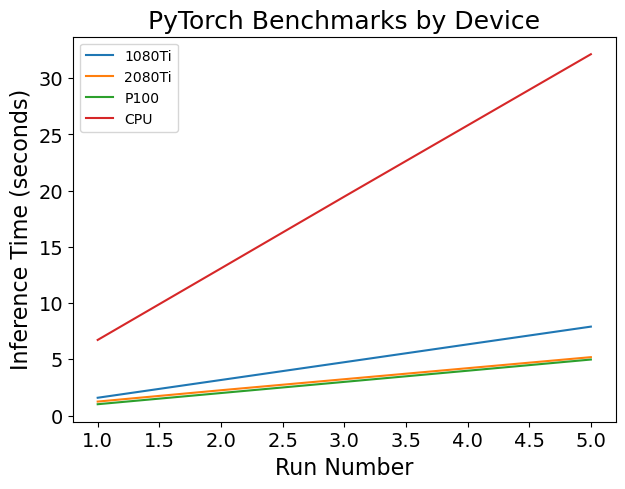

In [54]:
cumulative_plot(
    time_df, title="PyTorch Benchmarks by Device",
    figure_name='Pytorch_benchmark.jpg', log_scale=False
)

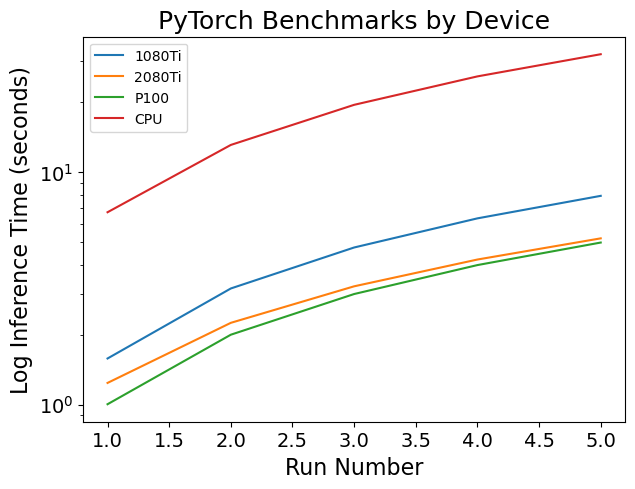

In [53]:
cumulative_plot(
    time_df, title="PyTorch Benchmarks by Device",
    figure_name='Pytorch_benchmark_log_scaled.jpg', log_scale=True
)

# Crypten

In [47]:
encrypted_time_df = pd.DataFrame({'Run number':range(1,6)})
encrypted_time_df.set_index('Run number', inplace=True)
for device in devices:
    encrypted_time_df[device] = files[device]['Test time (encrypted)'].values
    
encrypted_time_df

,1080Ti,2080Ti,P100,CPU
Run number,,,,
1,59.5329,38.6458,34.6146,776.1900
2,59.6639,38.8632,34.5742,782.1985
3,59.6539,38.9319,34.5390,779.5099
4,59.6441,39.1244,35.3275,779.9351
5,59.6514,39.9440,39.4246,782.1631


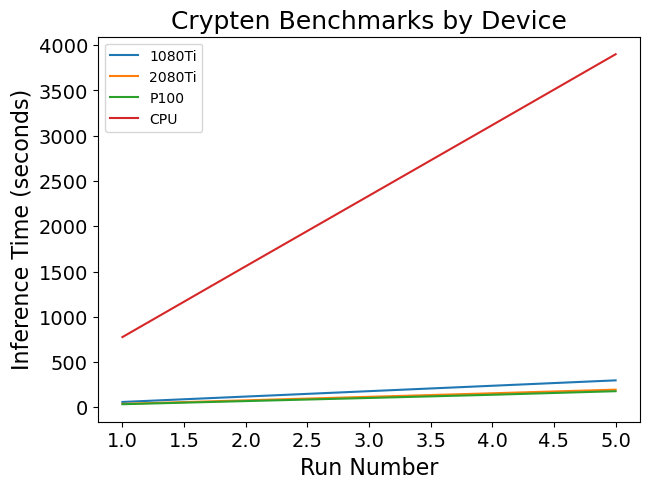

In [55]:
cumulative_plot(
    encrypted_time_df, title="Crypten Benchmarks by Device",
    figure_name='Crypten_benchmark.jpg', log_scale=False
)

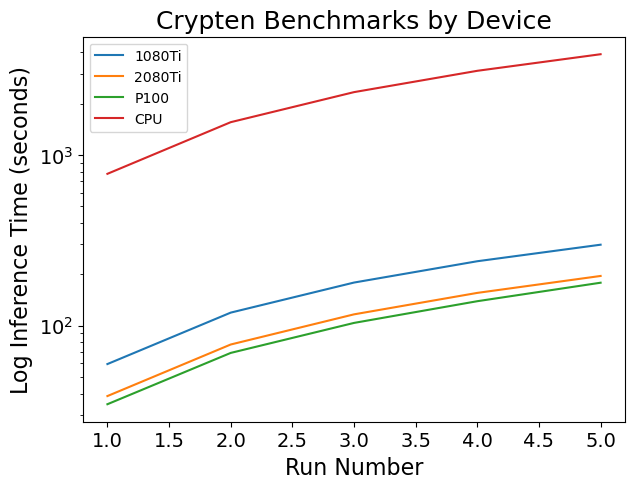

In [56]:
cumulative_plot(
    encrypted_time_df, title="Crypten Benchmarks by Device",
    figure_name='Crypten_benchmark_log_scaled.jpg', log_scale=True
)

# Pytorch vs Crypten

In [23]:
df = pd.DataFrame({'Run number':range(1,6)})
df.set_index('Run number', inplace=True)
for device in devices:
    df[f'pytorch_{device}'] = files[device]['Test time'].values
    df[f'crypten_{device}'] = files[device]['Test time (encrypted)'].values
    
df_means = df.mean().transpose()
df_means.columns = ['Device', 'Inference time (seconds)']
df_means

,pytorch_1080Ti,crypten_1080Ti,pytorch_2080Ti,crypten_2080Ti,pytorch_P100,crypten_P100,pytorch_CPU,crypten_CPU
Run number,,,,,,,,
1,1.5801,59.5329,1.2405,38.6458,1.0046,34.6146,6.7226,776.1900
2,1.5804,59.6639,1.0084,38.8632,0.9950,34.5742,6.3679,782.1985
3,1.5812,59.6539,0.9796,38.9319,0.9914,34.5390,6.3801,779.5099
4,1.5854,59.6441,0.9803,39.1244,0.9930,35.3275,6.3319,779.9351
5,1.5799,59.6514,0.9819,39.9440,0.9958,39.4246,6.3332,782.1631


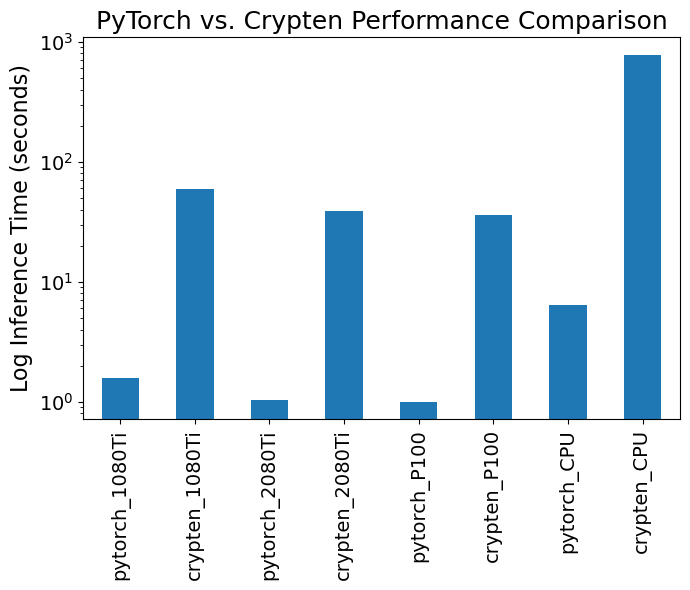

In [57]:
plt.figure(figsize=(7,6))
df_means.plot(kind="bar")
plt.title("PyTorch vs. Crypten Performance Comparison", fontsize=18)
# plt.xlabel("Device")
plt.ylabel("Log Inference Time (seconds)")
plt.yscale("log")
plt.tight_layout()
plt.savefig('pytorch_vs_crypten.jpg', dpi=200)